# Simple Linear Regression

Simple Linear regression is a statistical and machine learning method that models the relationship between one dependent (response) variable and one independent (predictor) variable by fitting a straight line to the data.

The straight line equation is used to predict values of the response variable from the values of the predictor variable and understand the linear connection between.

It works by finding the "best-fit" linear equation that minimizes the distance (residuals) between the actual data points and the predicted points on the line, allowing for the prediction of a continuous outcome based on known predictor variables.

It identifies the line of best fit by minimizing the sum of the squared differences (residuals) between the observed and predicted values, a method known as Ordinary Least Squares (OLS).

The goal is to find the equation of this line, which includes a slope and an intercept, to best represent the data points and make informed predictions.

The equation for simple linear regression is typically written as:

$y = b_0 + b_1x$

where
* $y$ is the estimated or predicted value of the dependent variable (response variable),
* $b_0$ is the y-intercept, which represents the predicted value of $y$ when $x$ is zero,
* $b_1$ is the slope of the line, shows the average change in $y$ for a one-unit increase in $x$,
* $x$ is the independent variable, or the predictor variable.

The following figure illustrates a simple linear regression model:

course-machine-learning-linear-regression.svg

## Load Dataset

We will use a dataset that contains data concerning house sizes and prices.

In [ ]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# csv file location
url = 'https://github.com/tariqzahratahdi/MachineLearning/raw/refs/heads/main/datasets/house_price.csv'

# making data frame from csv file
data = pd.read_csv(url)

# show dataframe
data


,size,price
0,1852,316000
1,1975,277000
2,1176,155000
3,1550,253000
4,1458,211000
5,2689,329000
6,2259,317000
7,2763,360000
8,1325,204000
9,1992,250000


## Caculating the Slope and the Intercept

We calculate the slope using the following formula:

${\displaystyle b_1 = r \frac{\sigma_y}{\sigma_x}}$

where
* $r$ is the correlation coefficient between the two variables $x$ and $y$,
* $\sigma_x$ is the standard deviation of the varaiable $x$,
* $\sigma_y$ is the standard deviation of the varaiable $y$.

### Correlation Coefficient

Given paired data $\{(x_1,y_1), \ldots , (x_n,y_n) \}$
consisting of $n$ pairs, Pearson's correlation coefficient $r_{xy}$ is defined as

$$
r_{xy}=
\frac
{
  \sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})
}
{
  \sqrt {\sum _{i=1}^{n}(x_{i}-\bar {x})^{2}}
  \sqrt {\sum _{i=1}^{n}(y_{i}-\bar {y})^{2}}
}
$$

where
* $n$ is the sample size,
* $x_i,y_i$ are the individual sample points indexed with $i$,
* $\bar{x}=\frac{1}{n}\sum_{i=1}^{n}x_{i}$ (the sample mean),
* $\bar{y}=\frac{1}{n}\sum_{i=1}^{n}y_{i}$ (the sample mean).

#### Calculating Correlation Coefficient in Pandas

We use the `pandas.corr()` method to calculate the correlation coefficient between two columns of a DataFrame.

In [ ]:
# correlation coefficient
r = data['size'].corr(data['price'])

print(r)

0.9152490111469164


### Standard Deviation

We use the population standard deviation.

We use the pandas `std()` method to calculate the standard deviation and set the parameter delta degrees of freedom to zeo: `ddof=0`.

Standard deviation of the response variable (price):

In [ ]:
std_y = data['price'].std(ddof=0)

print(std_y)

61341.340057093636


Standard deviation of the predictor variable(size):

In [ ]:
std_x = data['size'].std(ddof=0)

print(std_x)

518.1772766148666


### Slope

We calculate the slope using the following formula:

${\displaystyle b_1 = r \frac{\sigma_y}{\sigma_x}}$


In [ ]:
# calculate the slope
slope = r * (std_y / std_x)

print(slope)

108.3463196156505


### Intercept

We calculate the intercept using the following formula:

${\displaystyle b_0 = \bar{y} - b_1 . \bar{x}}$

where
* $\bar{y}$ is the mean of the variable $y$,
* $\bar{x}$ is the mean of the variable $x$.


In [ ]:
# calculate the intercept
intercept = data['price'].mean() - slope * data['size'].mean()

print(intercept)

60919.44208376299


### Visualization

The following figure shows a scatter plot of price data versus size data, and a line plot of the linear regression line.

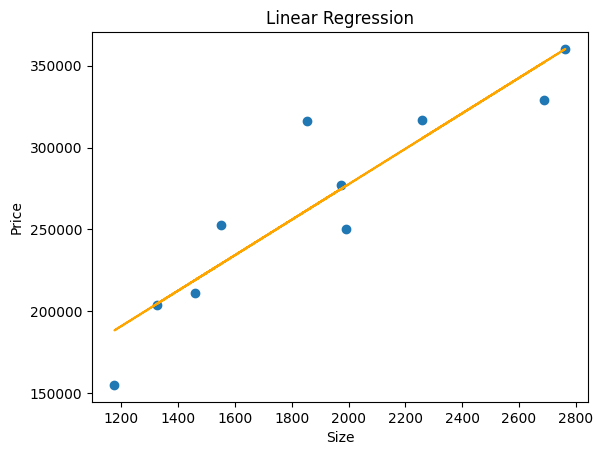

In [ ]:
# create figure and axes
fig, ax = plt.subplots()
ax.set_title('Linear Regression')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

# scatter plot
ax.scatter(data['size'], data['price'])

# plot linear regression line
ax.plot(data['size'], intercept + slope * data['size'], color='orange')

# show plot
plt.show()

### Perform Linear Regression Using NumPy

We use `numpy.polyfit()` function to calculate the slope ($b_1$) and intercept ($b_0$) of the regression line.

`numpy.polyfit()` performs a least-squares polynomial fit to data points.

It takes $x$ and $y$ coordinates of data points and a desired polynomial degree as input and returns the coefficients of the fitted polynomial.

*Syntax:*

`np.polyfit(x, y, deg)`

*Parameters:*

* `x`: The x-coordinates of the data points.
* `y`: The y-coordinates of the data points.
* `deg`: The degree of the polynomial to fit. For example, `deg=1` for a linear fit, `deg=2` for a quadratic fit, and so on.

*Output:*

It returns an array of coefficients `p` for the polynomial, ordered from the highest degree term to the lowest degree term (e.g., for a degree 2 polynomial, `p[0]` is the coefficient of $x^{2}$, `p[1]` is the coefficient of $x$, and `p[2]` is the constant term).

In [ ]:
# calculate slope and intercept
slope, intercept = np.polyfit(data['size'], data['price'], 1)

print('slope: ', slope)
print('intercept: ', intercept)

slope:  108.34631961565056
intercept:  60919.44208376292
